<a href="https://colab.research.google.com/github/Nehaasati/DSA_1/blob/master/trafic_sign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils.data_utils import Sequence
from tensorflow.keras.models import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show



In [0]:
from tqdm import tqdm
import os 
from random import shuffle
import cv2

In [0]:
DATA_DIR= "C:/Users/gasati/Desktop/n1/gtsrb-german-traffic-sign"
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300
BATCH_SIZE =64
epochs =16

In [0]:
validation_dir = os.path.join('/content/drive/My Drive/gtsrb-german-traffic-sign/Test')
train_dir = os.path.join('/content/drive/My Drive/gtsrb-german-traffic-sign/Train')

In [0]:
num_train = len(os.listdir(train_dir))
print(num_train)

43


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen= train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
 

Found 14238 images belonging to 43 classes.


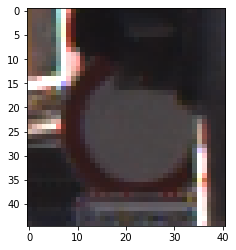

In [0]:

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("/content/drive/My Drive/gtsrb-german-traffic-sign/Train/15/00015_00000_00004.png")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

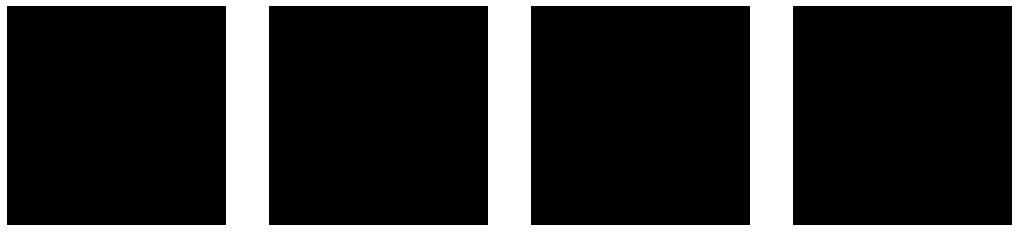

In [0]:
data_generator = ImageDataGenerator(rotation_range=90)
plot(data_generator)

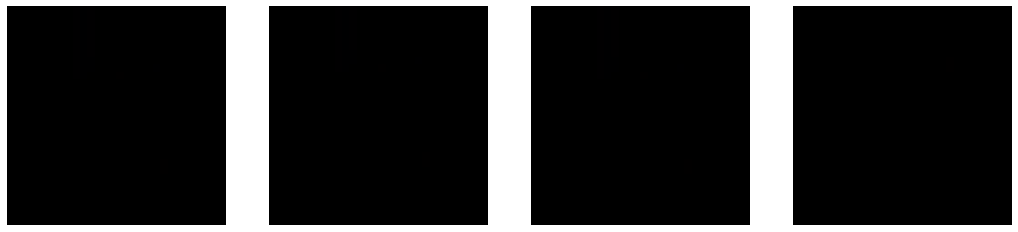

In [0]:
data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator)

In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                              )

Found 1446 images belonging to 43 classes.


In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
sample_training_images, _ = next(train_data_gen)

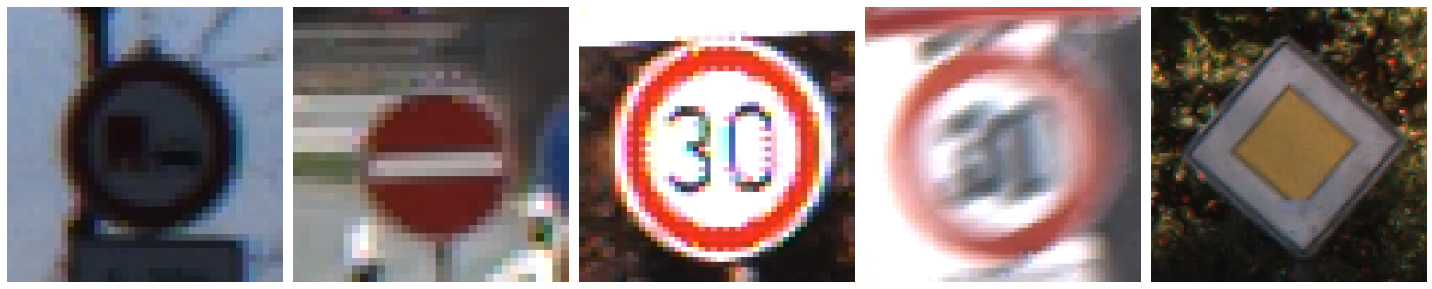

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(64, kernel_size=(1,5), activation='relu',  strides=(1, 1),input_shape=(300, 300 ,3)),
    Conv2D(64, kernel_size=(5,1) ,activation='relu', strides=(1, 1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, kernel_size=(1,5),activation='relu', strides=(2, 2)),
    Conv2D(128, kernel_size=(5,1),activation='relu', strides=(2, 2)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(256, kernel_size=(1,5),strides=(2, 2),activation='relu'),
    Conv2D(128, kernel_size=(5,1),activation='relu', strides=(2, 2)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    #Conv2D(128, kernel_size=(1,3), strides=(2, 2),activation='relu'),
    #Conv2D(128, kernel_size=(3,1), activation='relu'),
    #MaxPooling2D(),
    #Dropout(0.5),
    #Conv2D(256, kernel_size=(1,3), strides=(2, 2),activation='relu'),
    #Conv2D(128, kernel_size=(3,1), strides=(2, 2),activation='relu'),
    #MaxPooling2D(),
    #Dropout(0.5),
    Flatten(),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    Dense(43, activation='softmax'),
])

In [0]:
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 296, 64)      1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 296, 64)      20544     
_________________________________________________________________
batch_normalization (BatchNo (None, 296, 296, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 72, 128)       41088     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 36, 128)       82048     
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 36, 128)       5

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=64 // BATCH_SIZE,
    epochs=16,
    validation_data=val_data_gen,
    validation_steps=64 // BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
1/1 [==============================] - 81s 81s/step - loss: 4.0633 - accuracy: 0.0000e+00 - val_loss: 3.7605 - val_accuracy: 0.0625
Epoch 2/16
1/1 [==============================] - 80s 80s/step - loss: 3.6390 - accuracy: 0.0625 - val_loss: 3.7590 - val_accuracy: 0.0469
Epoch 3/16
1/1 [==============================] - 78s 78s/step - loss: 3.8533 - accuracy: 0.0312 - val_loss: 3.7576 - val_accuracy: 0.0312
Epoch 4/16
1/1 [==============================] - 76s 76s/step - loss: 3.2780 - accuracy: 0.1562 - val_loss: 3.7578 - val_accuracy: 0.0469
Epoch 5/16
1/1 [==============================] - 77s 77s/step - loss: 3.4227 - accuracy: 0.1719 - val_loss: 3.7640 - val_accuracy: 0.0312
Epoch 6/16
1/1 [==============================] - 78s 78s/step - loss: 3.2823 - accuracy: 0.1406 - val_loss: 3.7559 - val_accuracy: 0.0625
Epoch 7/16
1/1 [==============================] - 80s 80s/step - loss: 2.9534 - accura

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

